In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


### Workbench initialization with a database path

In [2]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'
path_to_mmpdf_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mmpdf-{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

In [3]:
sorted_metrics = workbench.sortByBestMSEDiff(path_to_mmpdf_db, ascending=False)
print(Counter([snr for snr in sorted_metrics['snr']]))

Counter({15: 1000, 10: 1000, 5: 1000, 0: 1000, -5: 1000})


## Top 10 of signals where OMP fails

In [4]:
sorted_metrics = sorted_metrics.loc[sorted_metrics['sparsity'] <= 3]
sorted_metrics = sorted_metrics.loc[sorted_metrics['snr'] == 10]
print(sorted_metrics.head(10))
ids = [id for id in sorted_metrics.head(10)['id']]
print(ids)

        id  snr  sparsity   omp-mse   mmp-mse  mse-diff
3060  3060   10         3  0.001490  0.000677  0.545368
3021  3021   10         3  0.001187  0.000543  0.542334
3032  3032   10         3  0.000948  0.000472  0.502614
3029  3029   10         3  0.000778  0.000467  0.399695
3091  3091   10         3  0.000786  0.000475  0.395702
3013  3013   10         3  0.000691  0.000422  0.388557
3160  3160   10         3  0.000705  0.000454  0.355661
3076  3076   10         3  0.001117  0.000729  0.347073
3002  3002   10         3  0.001060  0.000698  0.342127
3081  3081   10         3  0.000611  0.000404  0.339192
[3060, 3021, 3032, 3029, 3091, 3013, 3160, 3076, 3002, 3081]


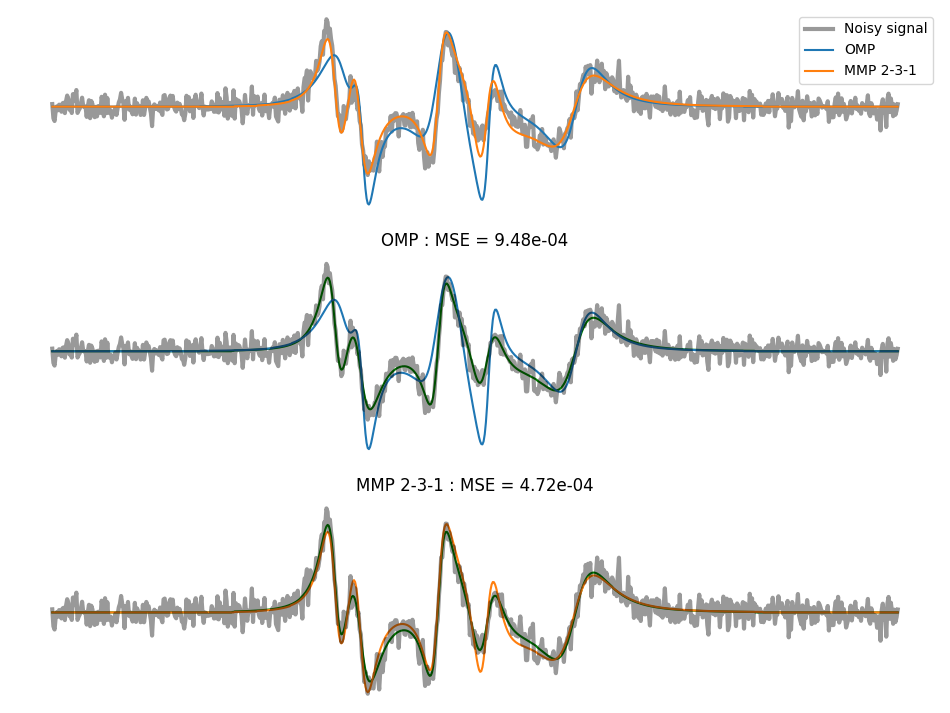

In [5]:
workbench.plotMMPComparison(mmpdf_db_path=path_to_mmpdf_db, id=ids[2])

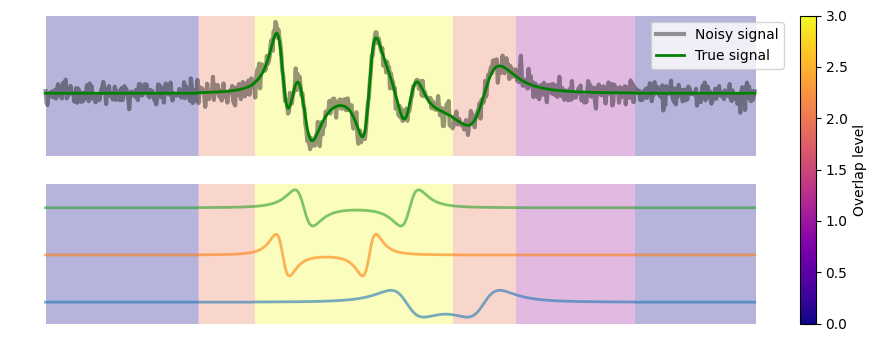

In [6]:
workbench.plotSignalOverlapFromId(id=ids[2])

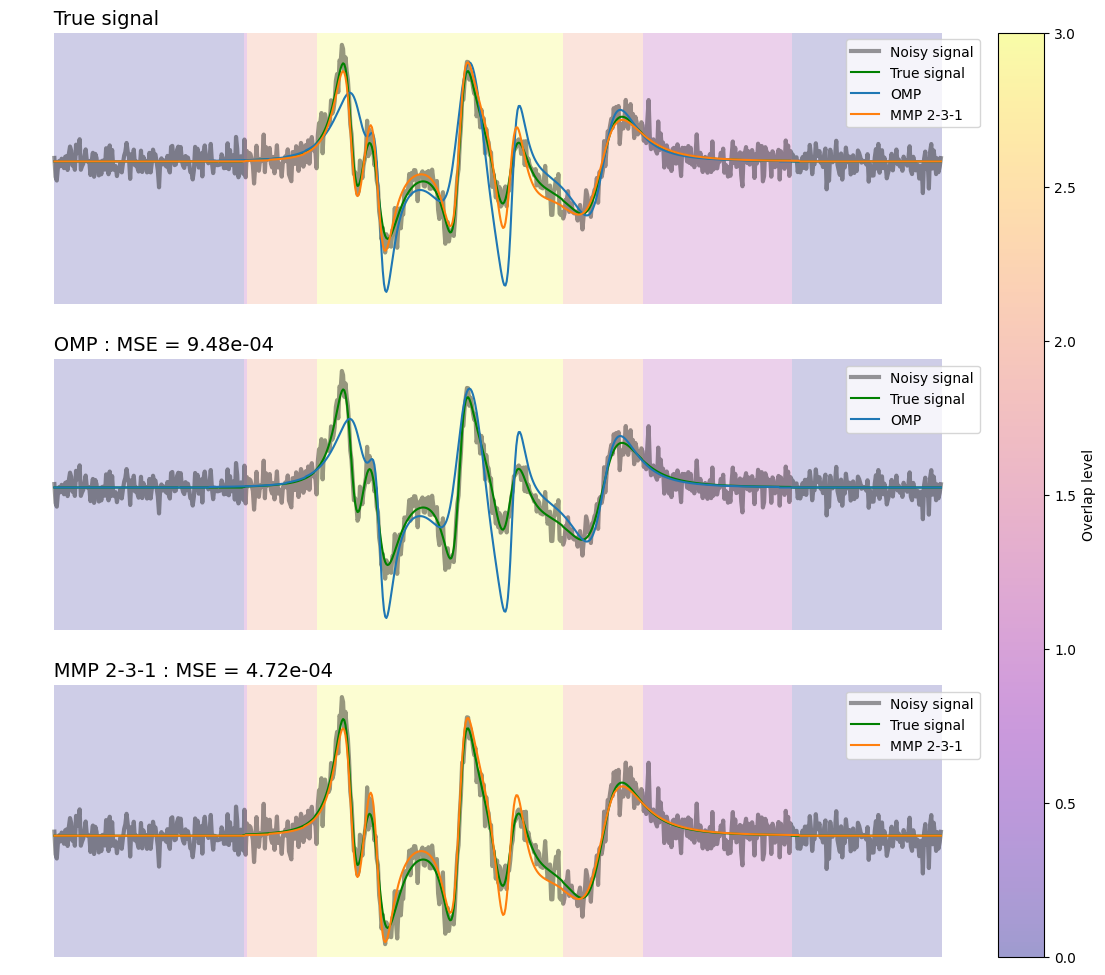

In [7]:
workbench.plotMethodComparison(mmpdf_db_path=path_to_mmpdf_db, id=ids[2])

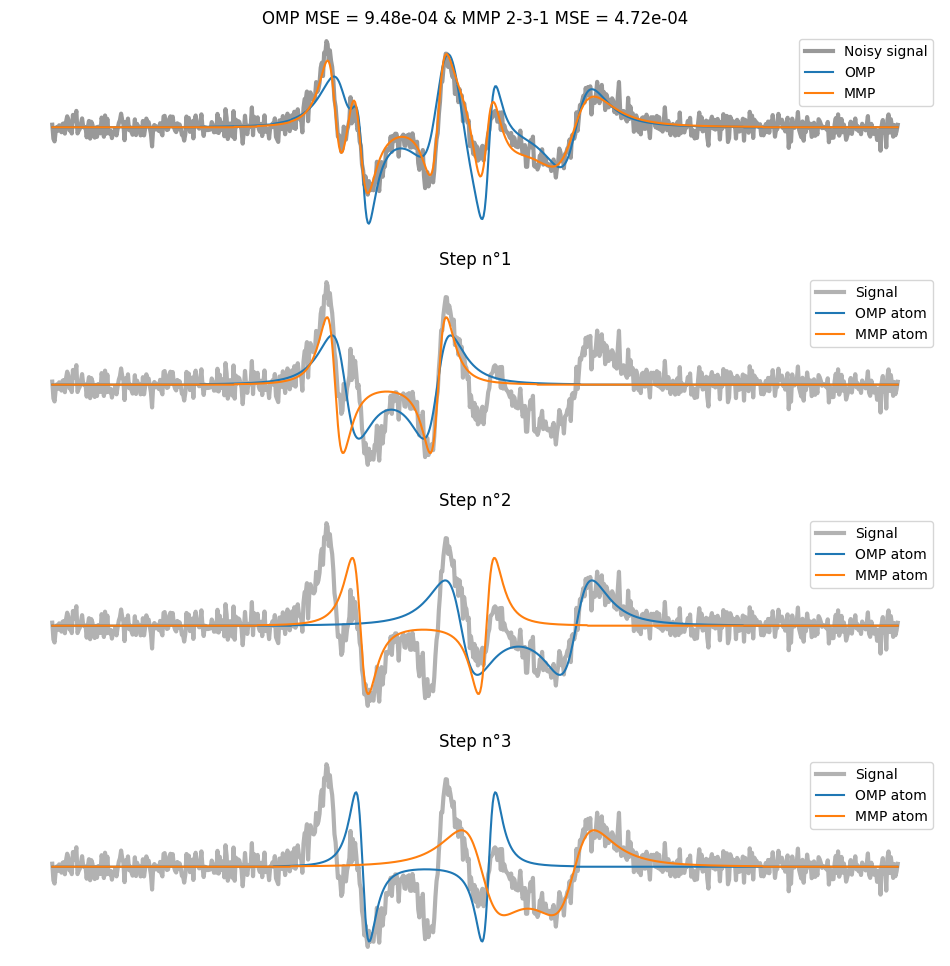

In [8]:
workbench.plotMMPDecomposition(db_path=path_to_mmpdf_db, id=ids[2])

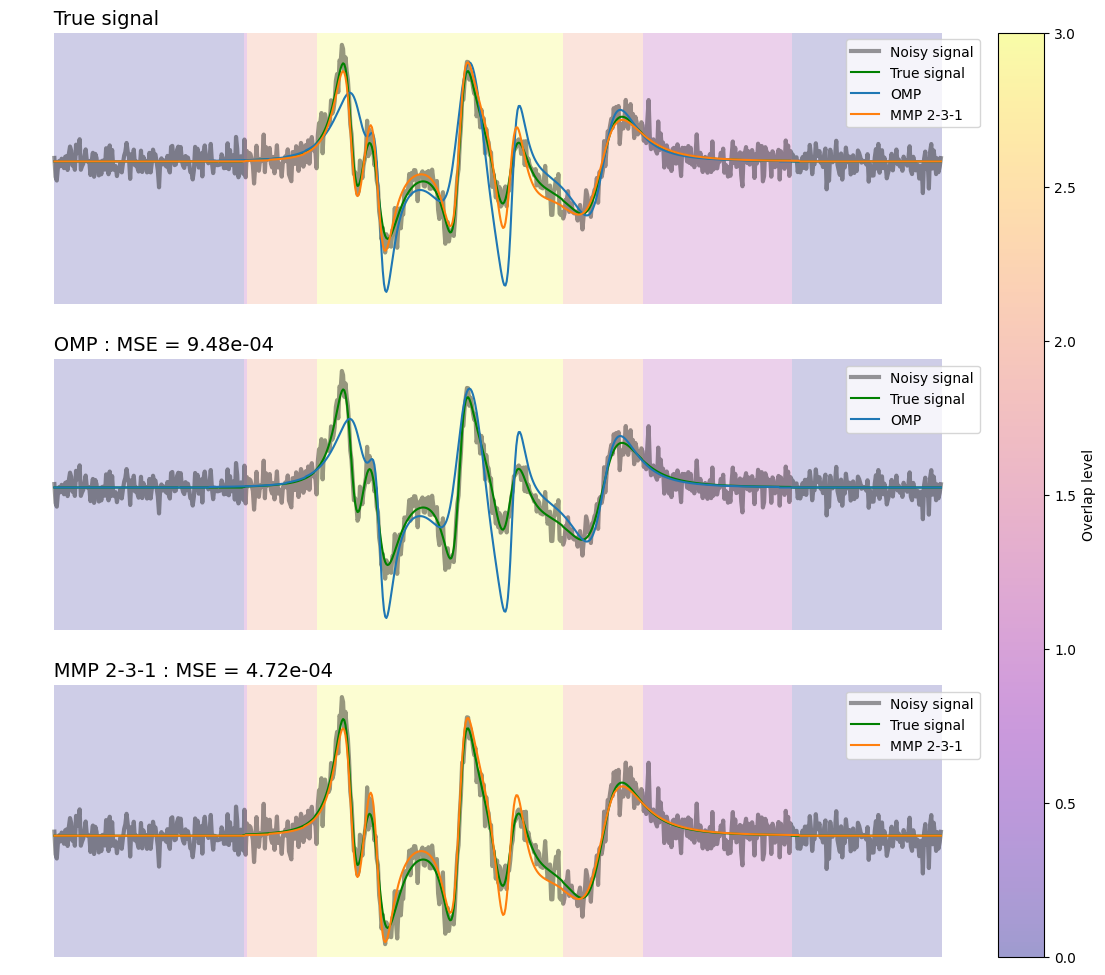

In [9]:
workbench.plotMethodComparison(mmpdf_db_path=path_to_mmpdf_db, id=ids[2])

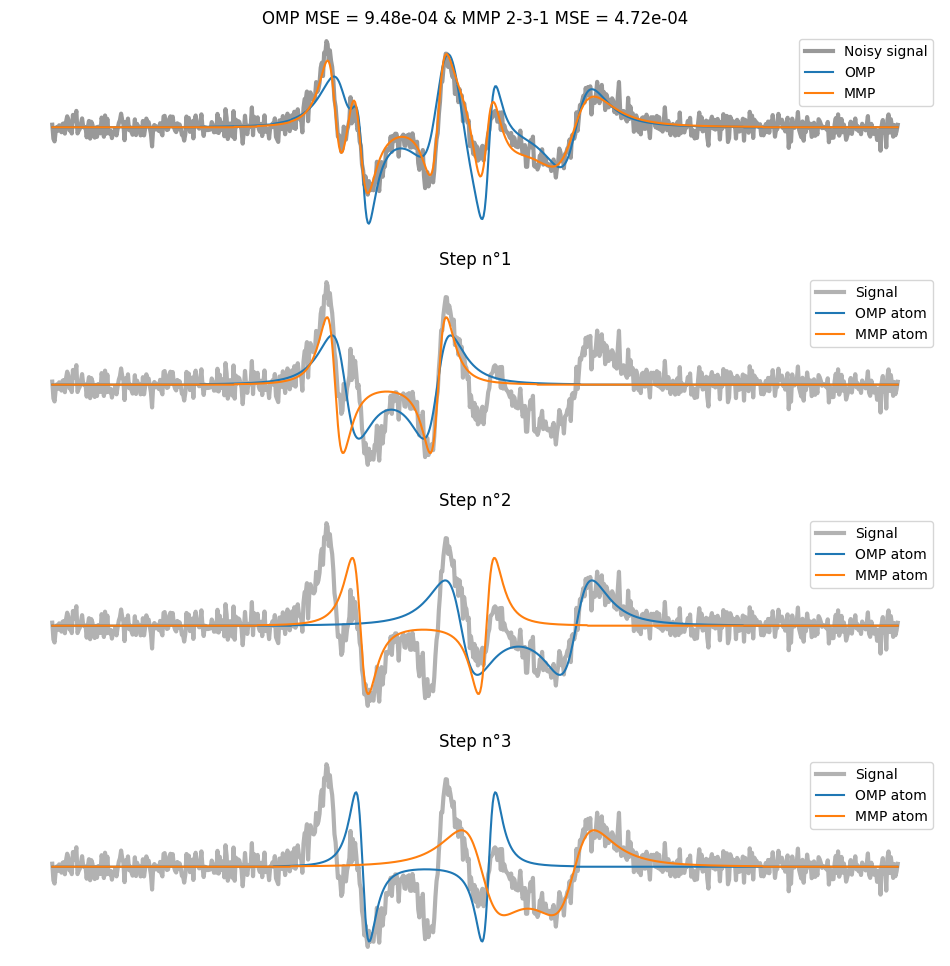

In [10]:
workbench.plotMMPDecomposition(db_path=path_to_mmpdf_db, id=ids[2])